# Visualizing Earnings Based On College Majors

In this project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.
We should add `%matplotlib inline` so that plots are displayed inline.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


We generate summary statistics for all of the numeric columns

In [2]:
recent_grads.describe().astype(int)

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173,173,172,172,172,172,173,173,173,173,173,173,173,173,173,173,173,173,173
mean,87,3879,39370,16723,22646,0,356,31192,26029,8832,19694,2416,0,40151,29501,51494,12322,13284,3859
std,50,1687,63483,28122,41057,0,618,50675,42869,14648,33160,4112,0,11470,9166,14906,21299,23789,6944
min,1,1100,124,119,0,0,2,0,111,0,111,0,0,22000,18500,22000,0,0,0
25%,44,2403,4549,2177,1778,0,39,3608,3154,1030,2453,304,0,33000,24000,42000,1675,1591,340
50%,87,3608,15104,5434,8386,0,130,11797,10048,3299,7413,893,0,36000,27000,47000,4390,4595,1231
75%,130,5503,38909,14631,22553,0,338,31433,25147,9948,16891,2393,0,45000,33000,60000,14444,11783,3466
max,173,6403,393735,173809,307087,0,4212,307933,251540,115172,199897,28169,0,110000,95000,125000,151643,148395,48207


Next, we drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors. After we do so, the count values of all column should be the same.

In [3]:
recent_grads = recent_grads.dropna()
recent_grads.describe().loc['count'].astype(int).T

Rank                    172
Major_code              172
Total                   172
Men                     172
Women                   172
ShareWomen              172
Sample_size             172
Employed                172
Full_time               172
Part_time               172
Full_time_year_round    172
Unemployed              172
Unemployment_rate       172
Median                  172
P25th                   172
P75th                   172
College_jobs            172
Non_college_jobs        172
Low_wage_jobs           172
Name: count, dtype: int64

In [4]:
# Top-5 most popular major is listed below:
recent_grads.sort_values('Total', ascending=False).head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.601858,1370,182295,...,72371,100336,13874,0.070725,33400,24000,45000,88232,81109,28339
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,...,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
93,94,1901,COMMUNICATIONS,213996.0,70619.0,143377.0,Communications & Journalism,0.669999,2394,179633,...,49889,116251,14602,0.075177,35000,27000,45000,40763,97964,27440


## Using Scatter Plot to investigate salary earned in popular majors

First, we are interested in the relationship between popular major and salary earned.
In other words, 

* Do students in more popular majors make more money?

Here, we will try to find the answer using scatter plot.

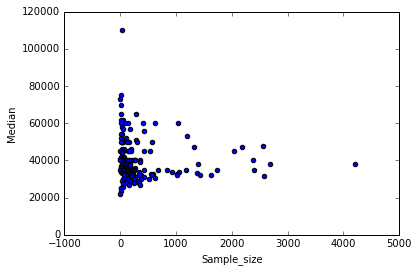

In [5]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

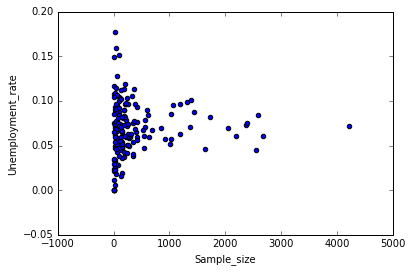

In [6]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

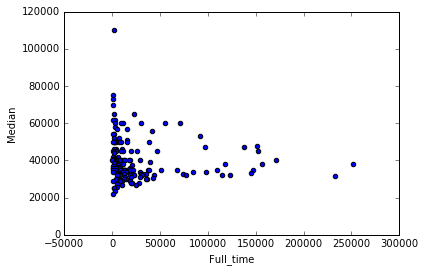

In [7]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

The number of median salary significantly decreased as the number of full-time employees.

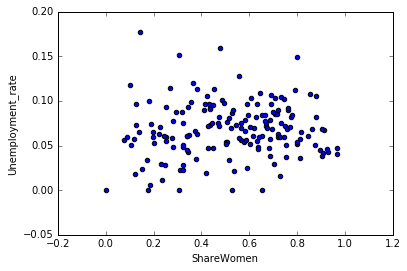

In [8]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

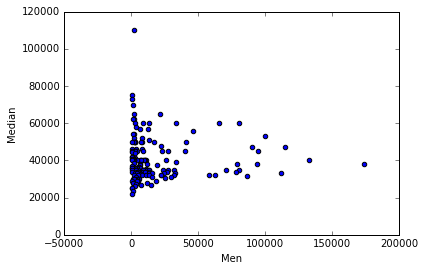

In [9]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

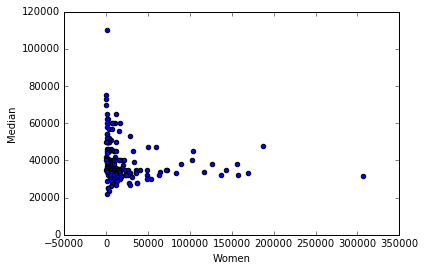

In [10]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

Based on the generated plots, we see that students that majored in subjects that were majority female (e.g., psychology) does not necessarily make more money.

## Exploring data range using histogram

Next, let's explore several parameters to answer the following questions:

* What is the range of the most common salary earned?
* What is the range of unemployment rate?

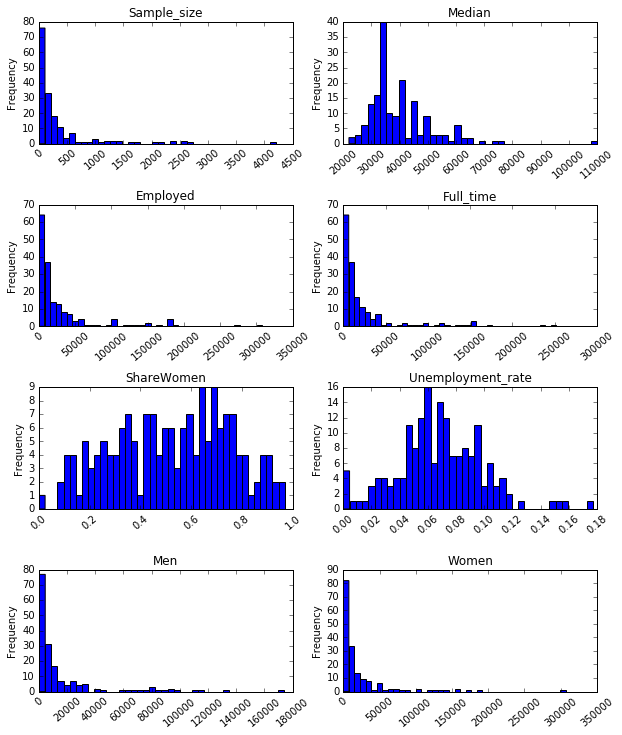

In [11]:
cols = ["Sample_size", "Median", "Employed", "Full_time", 
        "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(10,12))
plt.subplots_adjust(hspace=0.5)
for r in range(0,8):
    ax = fig.add_subplot(4,2,r+1)
    ax = recent_grads[cols[r]].plot(kind='hist', bins=40, rot=40)
    ax.set_title(cols[r])

We learn in the median histogram, that the most common median salary range is somewhere between 30k-40k USD per year.
The unemployment rate is rather condensed in the range between 0.04%-0.10%.

## Using Scatter Matrix Plot

Let's visualize the relations between multiple parameters below:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feda1b3c5c0>,
      dtype=object)

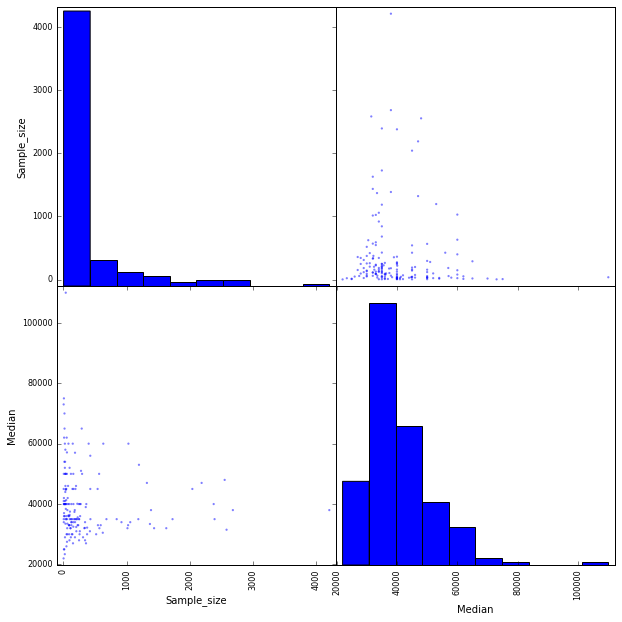

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feda133e8d0>,
      dtype=object)

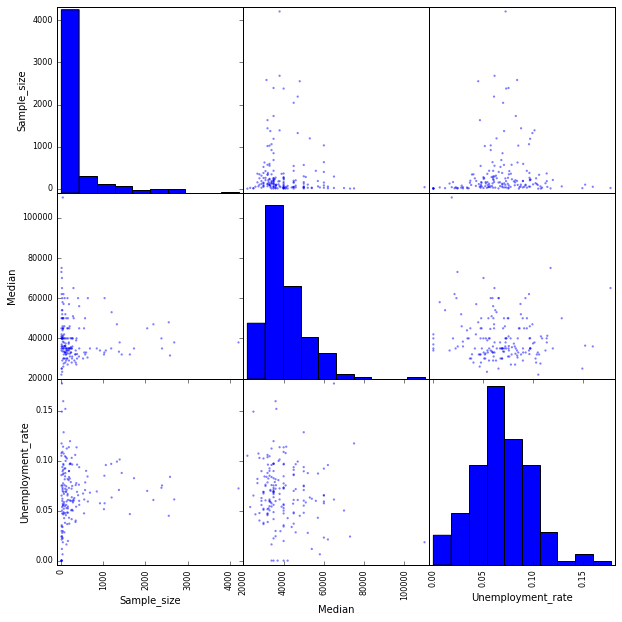

In [13]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(10,10))

## Using Bar Plots to explore data

Using bar plots, this is the question we will be answering

* Which majors have the most women students?
* Which majors have the highest unemployment rate?

Let's compare the percentages of women (ShareWomen) from the first ten max valued rows of the recent_grads dataframe.

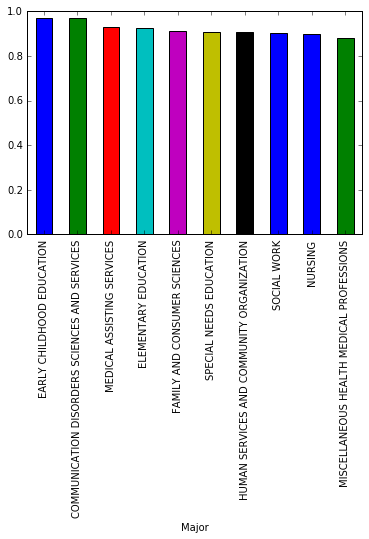

In [14]:
(recent_grads.sort_values('ShareWomen', ascending=False)[:10]
    .plot.bar(x='Major', y='ShareWomen', legend=False)
)

Early Childhood Education seems to be the No.1 major with the highest percentage of woman in total, followed by Communication Disorders Sciences And Services.

Second, we compare the unemployment rate (Unemployment_rate) from the first ten highest percentage based on major.

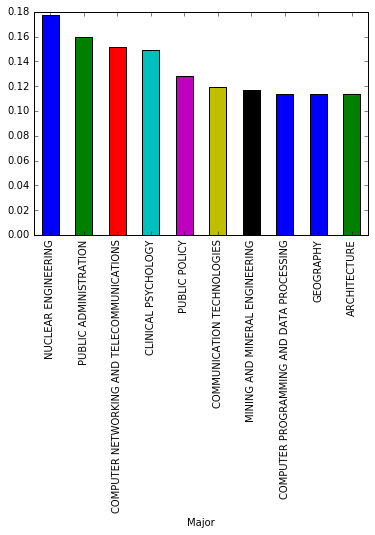

In [15]:
(recent_grads.sort_values('Unemployment_rate', ascending=False)[:10]
    .plot.bar(x='Major', y='Unemployment_rate', legend=False)
)

It turns out Nuclear Enginering is the No. 1 major with the highest unemployment rate. This is rather interesting, because the job offer related to nuclear is probably not so many compared to more common profession such as Public Administration, which is the No. 2 in the list.

# Conclusion

This project focuses on visualization based on the data released by American Community Survey, about earnings based on college majors.
We have explored various columns (using scatter plots, histograms, and bar plots) and also tried to use different visualization method, which makes it easier to visually spot the interesting data point which could potentially lead us to answers.

Specifically, we have answered the following questions:

* Using scatter plots
    * Do students in more popular majors make more money?

* Using histograms
    * What is the range of the most common salary earned?
    * What is the range of unemployment rate?

* Using bar plots
    * Which majors have the most women students?
    * Which majors have the highest unemployment rate?

There are still a lot of relationships between columns that we haven't fully explored. Here are some ideas:

* Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
* Use a box plot to explore the distributions of median salaries and unemployment rate.
* Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.